In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Experiment: <br> How many correct trading signal (in percent) are needed to generate alpha on the SP500?

In [16]:
# Import Libaries
import workshop_library as wl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 8.0)
fontsize=20
import numpy as np
from fintf import utils
import fintf
from workshop_library import financial_backtest, ws_helper

In [17]:
# Load SP 500 Data
df = fintf.get_symbol('SPY')

In [18]:
# Set the percentage you want your trading signals to match the actual up/down movement
w1 = ws_helper.percentage_widget
display(w1)

A Jupyter Widget

In [19]:
# Set the trading cost in base points (1 base point (bp) corresponds to 1 cent on 10.000 EUR trading volume)
w2 = ws_helper.trading_cost_widget
display(w2)

A Jupyter Widget

In [20]:
# Set the risk free interest rate as benchmark
w3 = ws_helper.interest_widget
display(w3)

A Jupyter Widget

Sharpe Ratio of this performance: 0.96
Average annual return: 12.3 %


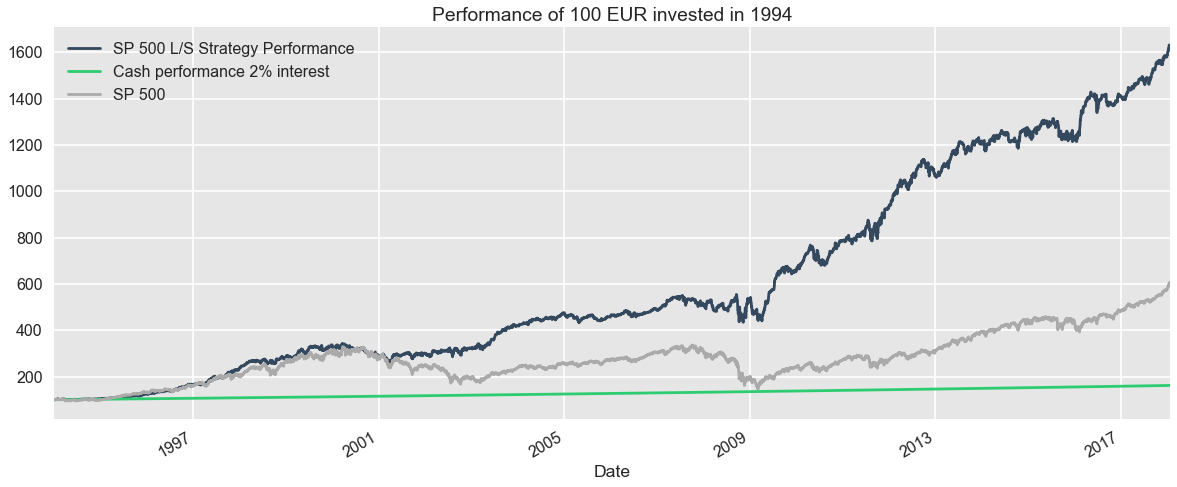

In [24]:
# Execute this field to calculate the number of correct trading signals and display the resulting performance
percentage_of_correct = w1.value/100.
cost_per_trade_in_bp = w2.value
risk_free_interest = w3.value/100.
df.index = pd.to_datetime(df.index)
df['target'] = df['Close'].pct_change().shift(-1) > 0
df['Signal'] = df['target']
rotated = (~df.target.sample(frac = 1-percentage_of_correct).astype(bool))*1
df.loc[rotated.index, 'Signal'] = rotated
fb = financial_backtest.Backtest(trading_signal=df['Signal'], underlying_series=df['Close'], transaction_cost_in_bp=cost_per_trade_in_bp)
ax = fb.performance.plot(title = 'Performance of 100 EUR invested in 1994', label = 'SP 500 L/S Strategy Performance')
ax.plot(fb.performance.index, 100*np.cumprod(pd.Series([np.power(1+risk_free_interest, 1/250)] * fb.performance.shape[0])), label = 'Cash performance 2% interest')
ax.plot(fb.performance.index, pd.Series(1+df.Close.pct_change().fillna(0)).cumprod()*100, color = '#AAAAAA', label = 'SP 500')
ax.legend()
print('Sharpe Ratio of this performance: %1.2f' % fb.sharpe_ratio)
print('Average annual return: %1.1f %%' % (fb.return_per_annum * 100))

# 